In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Grabbing and Cleaning Data

In [2]:
ghg = pd.read_csv('p5/data/total-ghg-emissions.csv')
ghg.drop(columns=['Code'], inplace=True)
ghg.rename(columns={"Total GHG emissions including LUCF (CAIT)":"Total GHG"}, inplace=True)
ghg = ghg[ghg['Year']>1989]
ghg = ghg[ghg['Year'] < 2015]
ghg.to_csv('../data/new_cleaned/ghg.csv')

In [3]:
airpol_death_share = pd.read_csv('p5/data/share-deaths-air-pollution.csv')
airpol_death_share.drop(columns=['Code'], inplace=True)
airpol_death_share.rename(columns={"Deaths - Cause: All causes - Risk: Air pollution - Sex: Both - Age: Age-standardized (Percent)": "Deaths %"}, inplace=True)
airpol_death_share = airpol_death_share[airpol_death_share['Year']>1989]
airpol_death_share = airpol_death_share[airpol_death_share['Year'] < 2015]
airpol_death_share.to_csv('../data/new_cleaned/airpol_death_share.csv')

In [4]:
airpol = pd.read_csv('p5/data/PM25-air-pollution.csv')
airpol.drop(columns=['Code'], inplace=True)
airpol.rename(columns={"PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)": "Air Pollution"}, inplace=True)
airpol = airpol[airpol['Year']>1989]
airpol = airpol[airpol['Year'] < 2015]
airpol.to_csv('../data/new_cleaned/airpol.csv')

In [5]:
net_zero_binary = pd.read_csv('p5/data/net-zero-target-set.csv')
net_zero_binary.drop(columns=['Code'], inplace=True)
net_zero_binary.rename(columns={"Is there a net-zero target?":"Net-Zero Target"}, inplace=True)
net_zero_binary.rename(columns={"Year":"Year-Zs"}, inplace=True)
net_zero_binary['Net-Zero Target'] = net_zero_binary['Net-Zero Target'].map({"Yes":1, "No":0})
#net_zero_binary = net_zero_binary[net_zero_binary['Year']>1989]
net_zero_binary.to_csv('../data/new_cleaned/net_zero_binary.csv')

In [6]:
'''
energy_country=pd.read_csv('../p5/data/country-primary-energy.csv')
energy_country.drop(columns=['Code'], inplace=True)
energy_country = energy_country[energy_country['Year']>1989]
energy_country.to_csv('../data/new_cleaned/energy_country.csv')
energy_country = energy_country[energy_country['Entity'] != 'World']
'''

"\nenergy_country=pd.read_csv('../p5/data/country-primary-energy.csv')\nenergy_country.drop(columns=['Code'], inplace=True)\nenergy_country = energy_country[energy_country['Year']>1989]\nenergy_country.to_csv('../data/new_cleaned/energy_country.csv')\nenergy_country = energy_country[energy_country['Entity'] != 'World']\n"

In [7]:
food_co2e = pd.read_csv('p5/data/emissions-from-food.csv')
food_co2e.drop(columns=['Code'], inplace=True)
food_co2e.rename(columns={"Food emissions by country":"Food Emissions"}, inplace=True)
food_co2e = food_co2e[food_co2e['Year']>1989]
food_co2e = food_co2e[food_co2e['Year'] < 2015]
food_co2e.to_csv('../data/new_cleaned/food_co2e.csv')

In [8]:
ozone = pd.read_csv('p5/data/consumption-of-ozone-depleting-substances.csv')
ozone.drop(columns=['Code'], inplace=True)
ozone.rename(columns={"Consumption of Ozone-Depleting Substances - All":"Consumption of Ozone"}, inplace=True)
ozone = ozone[ozone['Year']>1989]
ozone = ozone[ozone['Year'] < 2015]
ozone.to_csv('../data/new_cleaned/ozone.csv')

In [9]:
transport = pd.read_csv('p5/data/co2-emissions-transport.csv')
transport.drop(columns=['Code'], inplace=True)
transport.rename(columns={"Transport (CAIT, 2020)":"Transport"}, inplace=True)
transport = transport[transport['Year']>1989]
transport = transport[transport['Year'] < 2015]
transport = transport[transport['Entity'] != 'World']
transport = transport[transport['Entity'] != 'European Union (27)']
transport.to_csv('../data/new_cleaned/transport.csv')

In [10]:
co2_percap = pd.read_csv('p5/data/co-emissions-per-capita.csv')
co2_percap.drop(columns=['Code'], inplace=True)
co2_percap.rename(columns={"Annual CO2 emissions (per capita)":"CO2 Emissions Per Cap"}, inplace=True)
co2_percap = co2_percap[co2_percap['Year']>1989]
co2_percap = co2_percap[co2_percap['Year'] < 2015]
co2_percap.to_csv('../data/new_cleaned/co2_percap.csv')

In [11]:
share_co2 = pd.read_csv('p5/data/annual-share-of-co2-emissions.csv')
share_co2.drop(columns=['Code'], inplace=True)
share_co2.rename(columns={"Share of global annual CO2 emissions":"Shared CO2 Emissions"}, inplace=True)
share_co2 = share_co2[share_co2['Year']>1989]
share_co2 = share_co2[share_co2['Year'] < 2015]
share_co2.to_csv('../data/new_cleaned/share_co2.csv')

In [12]:
co2 = pd.read_csv('p5/data/annual_country_co2.csv')
co2.drop(columns=['Code'], inplace=True)
co2.rename(columns={"Annual CO2 emissions":"CO2 Emissions"}, inplace=True)
co2 = co2[co2['Year']>1989]
co2 = co2[co2['Year'] < 2015]
co2.to_csv('../data/new_cleaned/co2.csv')

In [13]:
list_data = [airpol_death_share, co2, co2_percap, food_co2e, ghg, ozone, share_co2, transport]

------------------------------

## Combining All Data

In [14]:
combos = pd.merge(airpol_death_share, co2, on=['Year', 'Entity'])
combos = pd.merge(combos, co2_percap, on=['Year', 'Entity'])
combos = pd.merge(combos, food_co2e, on=['Year', 'Entity'])
combos = pd.merge(combos, ghg, on=['Year', 'Entity'])
combos = pd.merge(combos, ozone, on=['Year', 'Entity'])
combos = pd.merge(combos, share_co2, on=['Year', 'Entity'])
combos = pd.merge(combos, transport, on=['Year', 'Entity'])
combos = combos.loc[:,~combos.columns.duplicated()]

In [15]:
combos

,Entity,Year,Deaths %,CO2 Emissions,CO2 Emissions Per Cap,Food Emissions,Total GHG,Consumption of Ozone,Shared CO2 Emissions,Transport
0,Albania,1991,17.613636,4228256,1.2889,4011691.0,9030000.0,0.00,0.02,500000.0
1,Albania,1995,16.789055,2066496,0.6638,4861321.1,7480000.0,43.40,0.01,600000.0
2,Albania,1996,16.588451,1993216,0.6432,4569702.9,7280000.0,43.20,0.01,600000.0
3,Albania,1997,15.081361,1531552,0.4941,4431656.7,6510000.0,45.20,0.01,500000.0
4,Albania,1998,15.965796,1744064,0.5607,4344061.6,6810000.0,49.60,0.01,700000.0
...,...,...,...,...,...,...,...,...,...,...
2653,Zimbabwe,2010,9.450169,7878316,0.6205,55244889.2,66540000.0,29.30,0.02,1300000.0
2654,Zimbabwe,2011,10.053401,9743983,0.7557,53985614.6,67420000.0,22.22,0.03,2300000.0
2655,Zimbabwe,2012,10.455091,7882889,0.6011,54211027.7,67630000.0,16.20,0.02,2600000.0
2656,Zimbabwe,2013,10.691584,11836254,0.8866,54321218.5,67550000.0,15.76,0.03,2900000.0


In [16]:
combos.to_csv('../data/new_cleaned/all_cleaned.csv')

-------------------------

## Plotting

<AxesSubplot:>

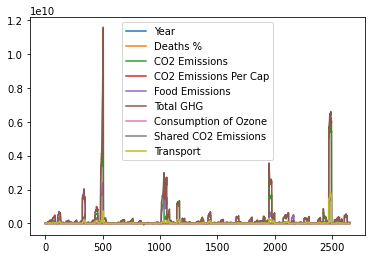

In [17]:
combos.plot()

In [18]:
combos.columns

Index(['Entity', 'Year', 'Deaths %', 'CO2 Emissions', 'CO2 Emissions Per Cap',
       'Food Emissions', 'Total GHG', 'Consumption of Ozone',
       'Shared CO2 Emissions', 'Transport'],
      dtype='object')

In [19]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.cluster import DBSCAN, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

df = combos.drop(columns=['Entity'])
# random seed
np.random.seed(24)

# Scaling 
ss = StandardScaler()
ss.fit(df)

X = ss.transform(df)


# clustering- pick min & max clusters
scores = []
for ki in range(len(df)):
  kmeans = KMeans(n_clusters=4, random_state=24)
  kmeans.fit(X)
  inertia = kmeans.inertia_
  scores.append([ki, inertia])

inertia_df = pd.DataFrame(scores, columns=['n_clusters', 'inertia'])


# hierarchical clustering
# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]
# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]
high_cophenet_corr = 0
high_dm_lm = [0, 0]
for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(hc_df, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(hc_df))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm


# DBSCAN
dbscan = combos
dbscan.fit(X)

# DBSCAN stuffs
def find_best_silhouette(df):
    
    max_score = -1
    ss = StandardScaler()
    df_scaled = ss.fit_transform(df)
    
    for epsilon in np.linspace(.2, 5, 30):
        for minsamples in range(3, len(df)//2):
            dbscan = DBSCAN(eps=epsilon, min_samples=minsamples, n_jobs=-1)
            dbscan.fit(df_scaled)
            if len(set(dbscan.labels_))>1:
                score = silhouette_score(df_scaled, dbscan.labels_)
                if score > max_score:
                    max_score = score
                    best_eps = epsilon
                    best_minsamples = minsamples
                    
    print(f'Best silhouette score was {max_score}')
    print(f'Best eps was {best_eps}')
    print(f'Best min_samples was {best_minsamples}')
    return



NameError: name 'hc_df' is not defined